**Importando bibliotecas**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Base**

In [2]:
path = 'https://raw.githubusercontent.com/Tyra02/IA/main/jogarTenis.csv'
base = pd.read_csv(path)

In [3]:
base

,Aparência,Temperatura,Umidade,Ventando,Jogar
0,Sol,Quente,Alta,Não,Não
1,Sol,Quente,Alta,Sim,Não
2,Nublado,Quente,Alta,Não,Sim
3,Chuva,Agradável,Alta,Não,Sim
4,Chuva,Fria,Normal,Não,Sim
5,Chuva,Fria,Normal,Sim,Não
6,Nublado,Fria,Normal,Sim,Sim
7,Sol,Agradável,Alta,Não,Não
8,Sol,Fria,Normal,Não,Sim
9,Chuva,Agradável,Normal,Não,Sim


**Tratando a base**

In [4]:
X = base.copy()
Y = X.pop('Jogar')

In [5]:
encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0])], remainder='passthrough')
X = encoder.fit_transform(X)

encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [3])], remainder='passthrough')
X = encoder.fit_transform(X)

encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [6])], remainder='passthrough')
X = encoder.fit_transform(X)

encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [8])], remainder='passthrough')
X = encoder.fit_transform(X)

In [6]:
X

array([[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
       [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
       [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],
       [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0],
       [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]], dtype=object)

**Separando treino e teste**

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 23)

**Treinando o modelo**

In [8]:
rfc = RandomForestClassifier(n_estimators=10, max_features=3, criterion='gini', random_state = 0)
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_features=3, n_estimators=10, random_state=0)

**Prevendo e mostrando resultados**

In [9]:
Y_pred = rfc.predict(X_test)
Y_pred

array(['Não', 'Não', 'Sim'], dtype=object)

In [10]:
Y_test

0    Não
1    Não
2    Sim
Name: Jogar, dtype: object

<Axes: >

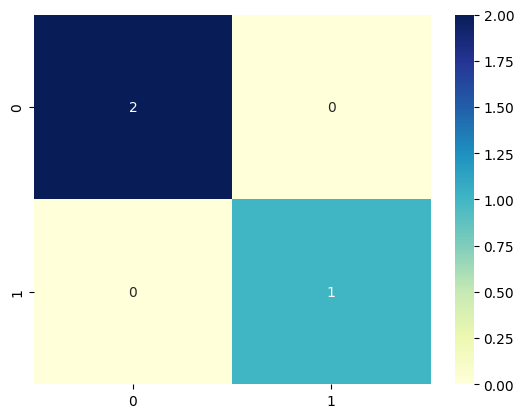

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [12]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         Não       1.00      1.00      1.00         2
         Sim       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

